In [1]:
# the usual ...
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plot

# Make the plot a certain size
plot.rcParams["figure.figsize"] = [8, 6]

# Shows an image, and saves it if a filename is given
def display_image(img, file_name=None):
    
    flt_img = img.astype(float)
    img_max, img_min = np.max(flt_img), np.min(flt_img)
    
    norm_img = (((flt_img - img_min) / (img_max - img_min)) * 255).astype(np.uint8)
    
    if len(img.shape) == 2:
        plot.imshow(norm_img, cmap='gray')
    elif (len(img.shape) == 3):
        plot.imshow(cv.cvtColor(norm_img, cv.COLOR_BGR2RGB))
    plot.show()
    
    if file_name:
        cv.imwrite(file_name, norm_img)

In [2]:
gray = cv.imread('building.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
blur = cv.GaussianBlur(gray,(5,5),7)
Ix = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=5)
Iy = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=5)


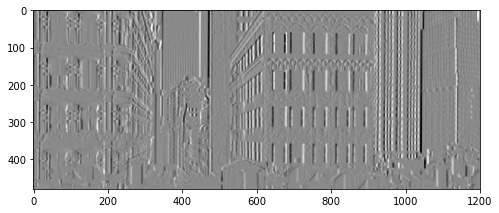

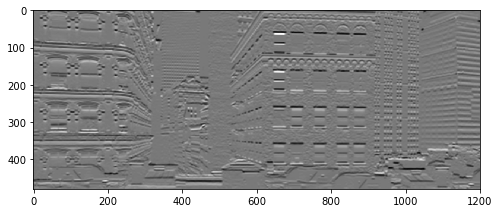

In [3]:
display_image(Ix)
display_image(Iy)


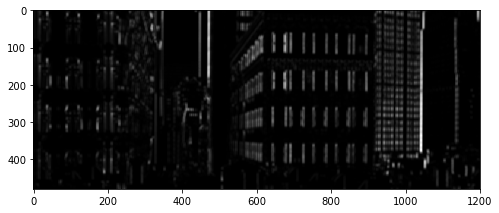

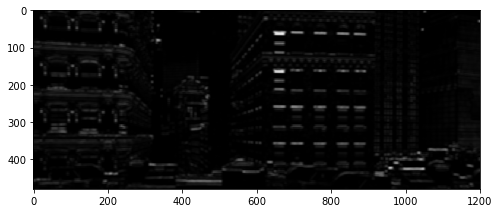

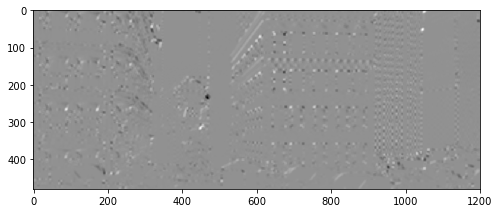

In [4]:
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)

Ix2_blur = cv.GaussianBlur(Ix2,(7,7),10) 
Iy2_blur = cv.GaussianBlur(Iy2,(7,7),10) 
IxIy_blur = cv.GaussianBlur(IxIy,(7,7),10) 

display_image(Ix2_blur)
display_image(Iy2_blur)
display_image(IxIy_blur)

In [5]:
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

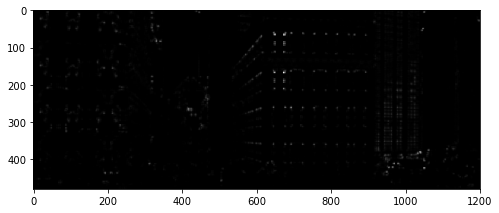

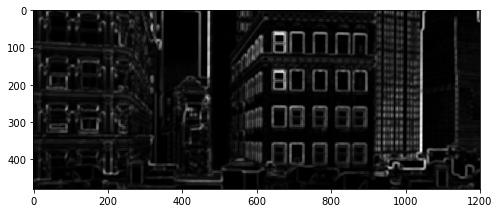

In [6]:
display_image(det)
display_image(trace)

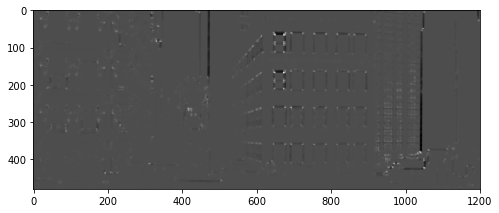

In [8]:
R = det - 0.05 * np.multiply(trace,trace)
display_image(R)